# Potential and Field

In the previous notebook, you explored the effects and properties of the vector operations ***divergence***, ***gradient***, and ***curl***.  In this notebook, you will use these operations to explore relations between the electric field, the electrostatic potential, and the charge density.


## Zero Curl

Consider the following electric field:
$$
\vec{E} = (2xy^2 + z^3) \, \hat{\mathbf{e}}_x
        + (2x^2y) \, \hat{\mathbf{e}}_y
        + (3xz^2) \, \hat{\mathbf{e}}_z
$$

Show that $\nabla \times \vec{E} = 0$.

Adapt the methods of the previous notebook to do the following:

1. Define the vector field $\vec{E}$ on a 3D grid.
2. Plot $\vec{E}$.
3. Compute the curl, $\nabla \times \vec{E}$, on the same grid.
4. Demonstrate that $\nabla \times \vec{E} \approx 0$.

For Part 4, do not simply compute the curl.  You may not obtain strict equality in part 4 due to numerical error and edge effects, but you should provide some quantitative evidence that the curl is nearly zero nearly everywhere.

The magnitude of the curl of the E-field at 0,0,0 is  0.0009765625


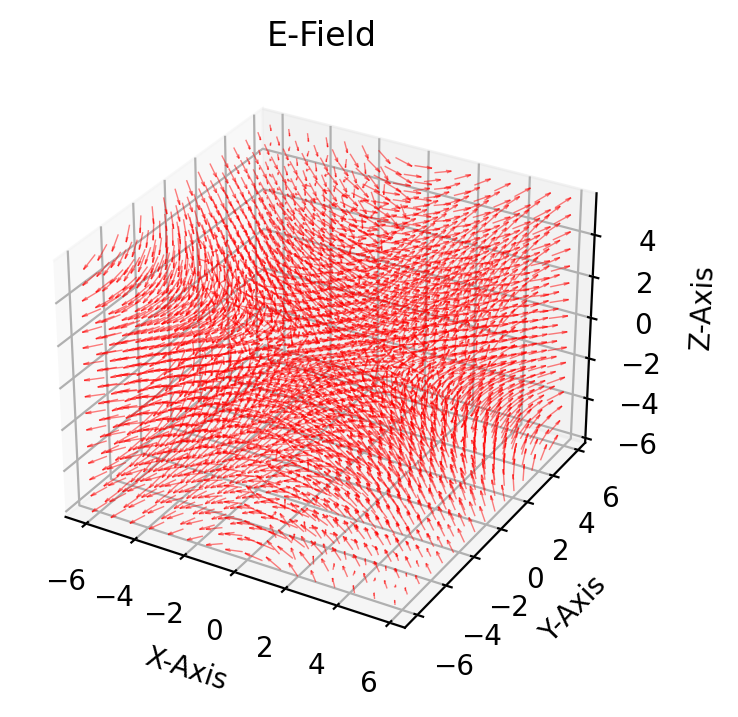

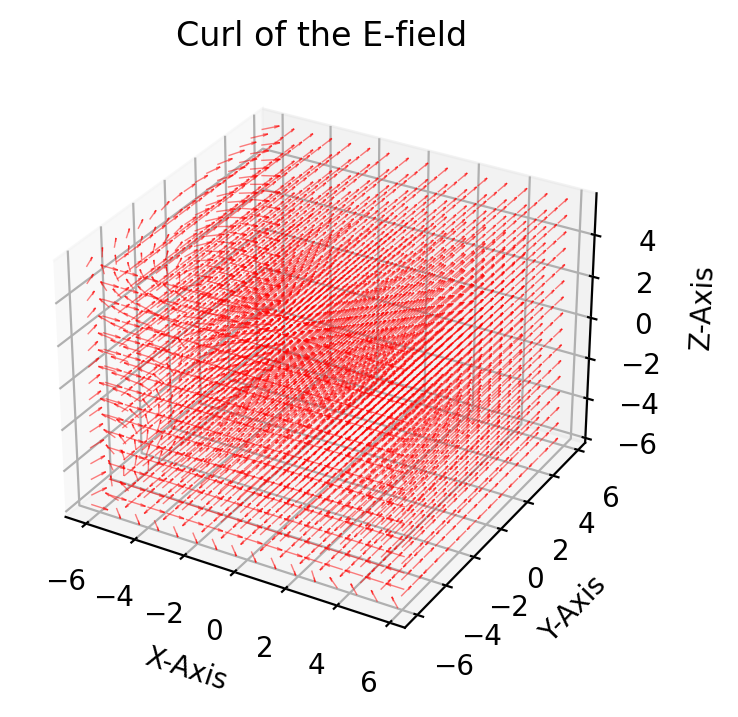

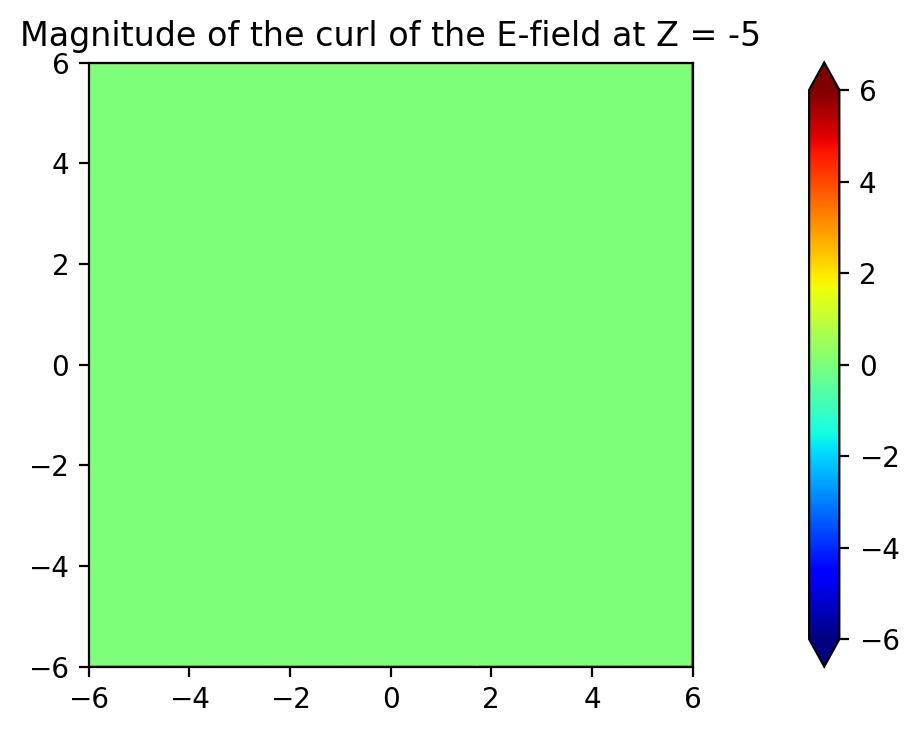

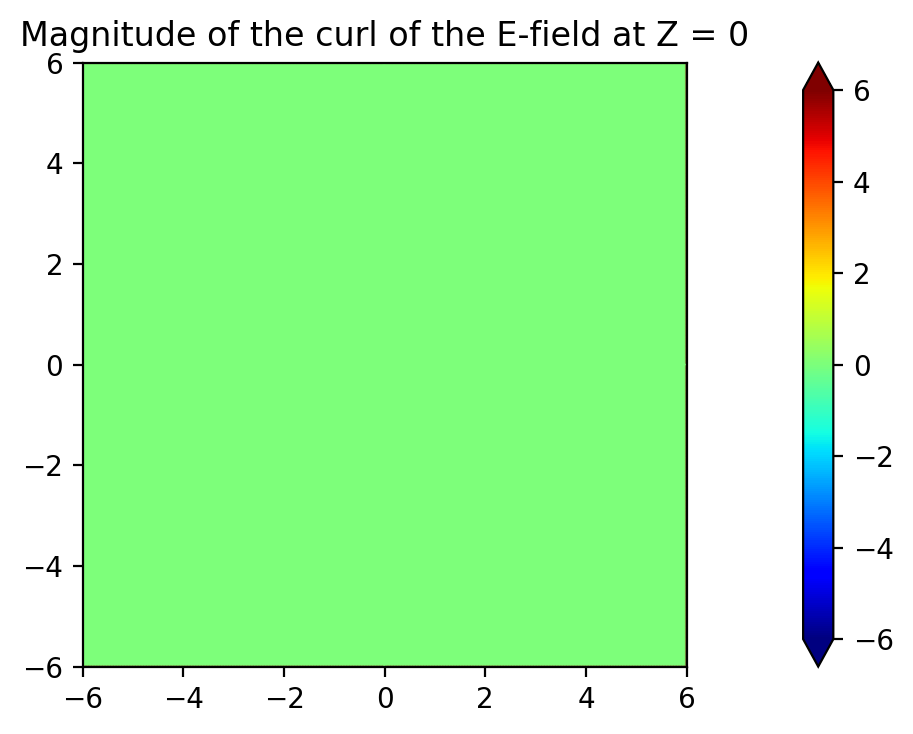

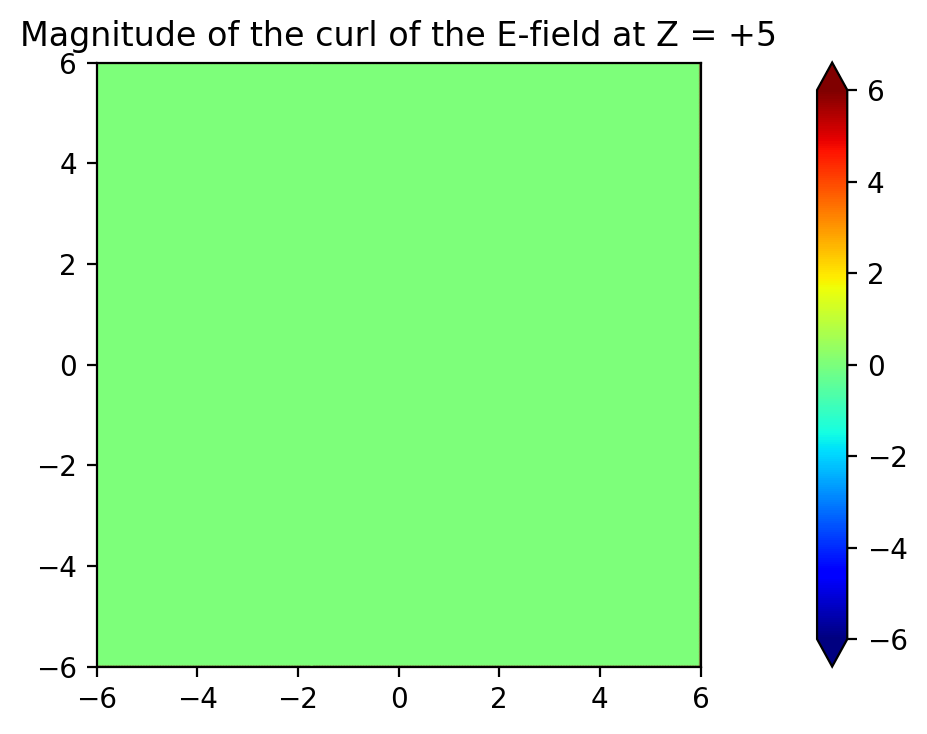

In [19]:
# Code derived from previous EE330 modules by Jordan Harris-Toovy

# Import & declair computational python packages:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Import and (re)load the custom libaries for electrodynamics and vector calculus:
import VectorCalculus as vc
import Electrodynamics as ed

from importlib import reload
reload(vc)
reload(ed)

# Setup coordinate grid parameters:
nPoints = 385
sBox = 6
X,Y,Z = ed.coordinates(L=sBox, N=nPoints)

# Create field arrays:
Fx = 2*X*(Y**2)+(Z**3)
Fy = 2*(X**2)*Y
Fz = 3*X*(Z**2)
Fe = np.stack([Fx,Fy,Fz])

# Plot the E-field using a quiver plot
ePlt = ed.draw_vector_field(X,Y,Z,*Fe)
ePlt.set_xlabel('X-Axis')
ePlt.set_ylabel('Y-Axis')
ePlt.set_zlabel('Z-Axis')
ePlt.set_title('E-Field')

# Compute the curl of the E-field function:
gridSpacing = X[1,0,0]-X[0,0,0]
eCurl = vc.curl(Fe,gridSpacing)

# Plot the curl of the E-field:
eCPlt = ed.draw_vector_field(X,Y,Z,*eCurl)
eCPlt.set_xlabel('X-Axis')
eCPlt.set_ylabel('Y-Axis')
eCPlt.set_zlabel('Z-Axis')
eCPlt.set_title('Curl of the E-field')

# Find the magnitude of the curl vector field
eCurlMag = np.sqrt((eCurl[0,:,:,:]**2)+(eCurl[1,:,:,:]**2)+(eCurl[2,:,:,:]**2))

# Plot a few slices of the mangnitude of the curl vector field
eCmag1 = ed.draw_scalar_field(X,Y,Z,eCurlMag,-5,6)
eCmag1.set_title('Magnitude of the curl of the E-field at Z = -5')
eCmag2 = ed.draw_scalar_field(X,Y,Z,eCurlMag,0,6)
eCmag2.set_title('Magnitude of the curl of the E-field at Z = 0')
eCmag3 = ed.draw_scalar_field(X,Y,Z,eCurlMag,5,6)
eCmag3.set_title('Magnitude of the curl of the E-field at Z = +5')

# Print the value of the mangnitude of the curl vector field in the center
print('The magnitude of the curl of the E-field at 0,0,0 is ', eCurlMag[143,143,143])

## Gradient

Find the potential.

Since the curl of $\vec{E}$ is zero, we can write $\vec{E}$ as the gradient of a function $\phi$:
$$\nabla \times \vec{E} = 0 \qquad \implies \qquad \vec{E} = -\nabla \phi$$

Determine a function $\phi(x,y,z)$ whose gradient is $\vec{E}$.

1. Derive the scalar field $\phi$.  Use any method you like: pencil and paper, trial and error, symbolic computing, etc.
2. Define the scalar field $\phi$ on a 3D grid.
3. Plot a slice of $\phi$ for some constant $z$-values of your choice.
4. Compute the gradient, $\nabla \phi$, on the same grid.
5. Compare $-\nabla\phi$ and the original field $\vec{E}$.  Demonstrate that $\vec{E} \approx - \nabla \phi$.

For Part 5, do not simply compute the gradient.  You may not obtain strict equality due to numerical error and edge effects, but you should provide some quantitative evidence that the gradient of the function you chose is nearly equal to $\vec{E}$ nearly everywhere.

The magnitude of the difference in the E-fields at 0,0,0 is  1.649563518414366e-12


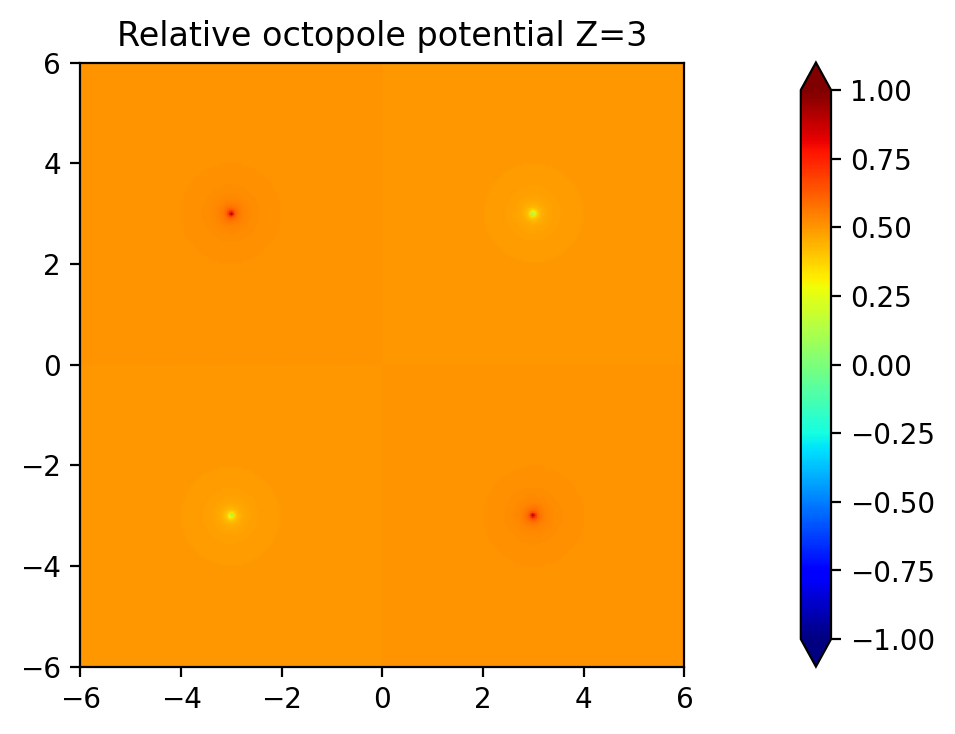

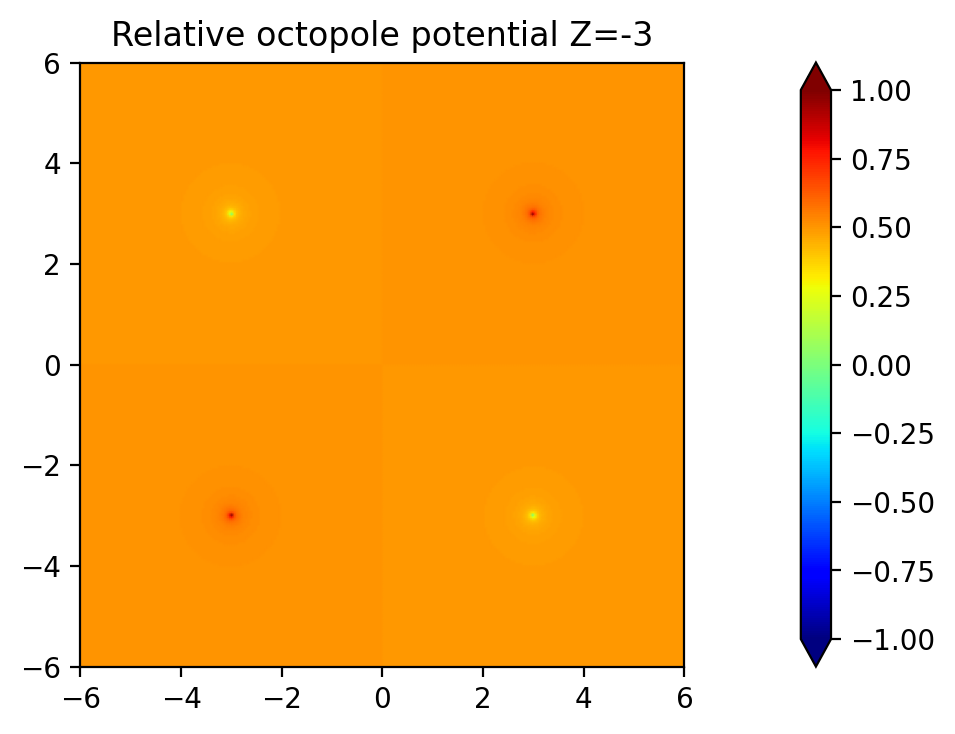

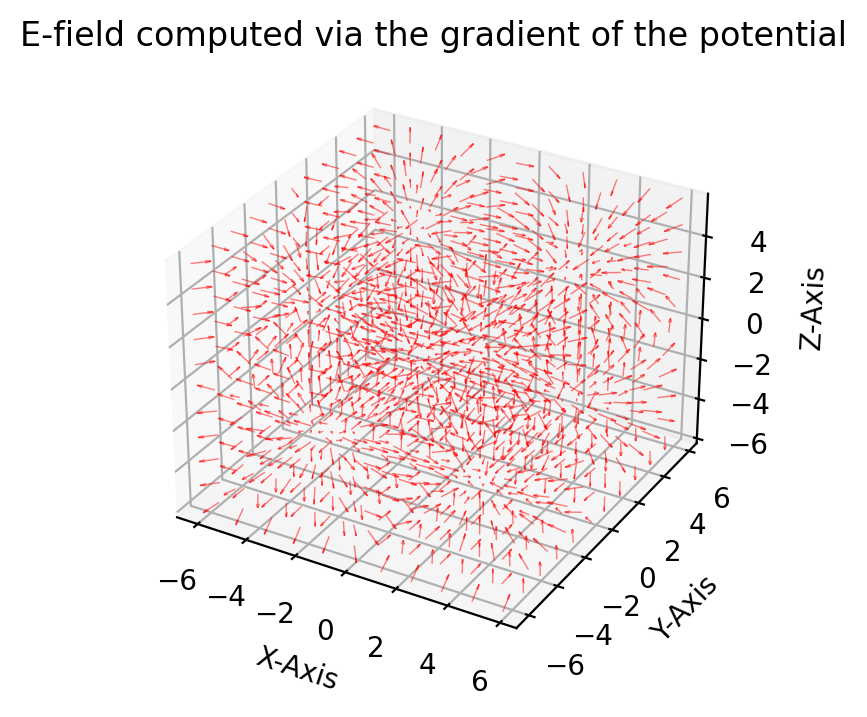

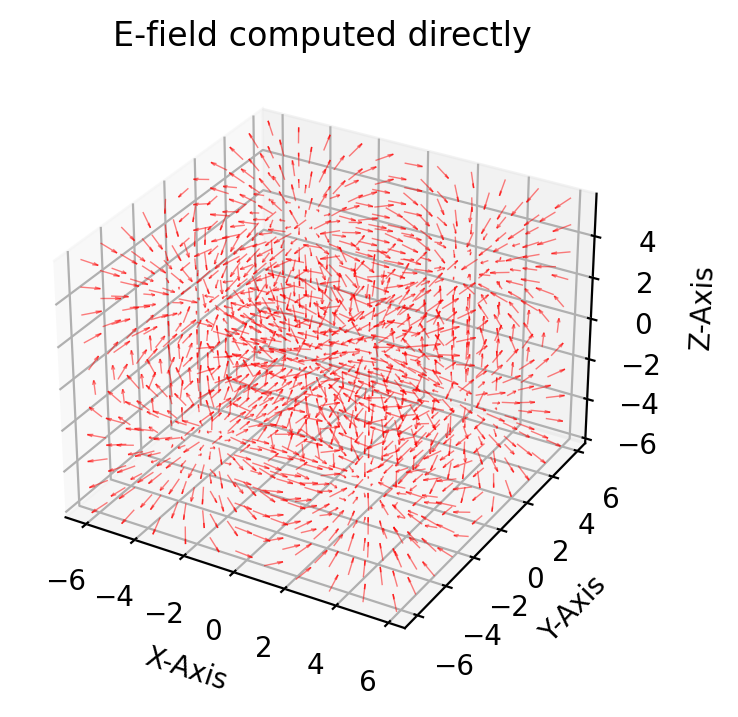

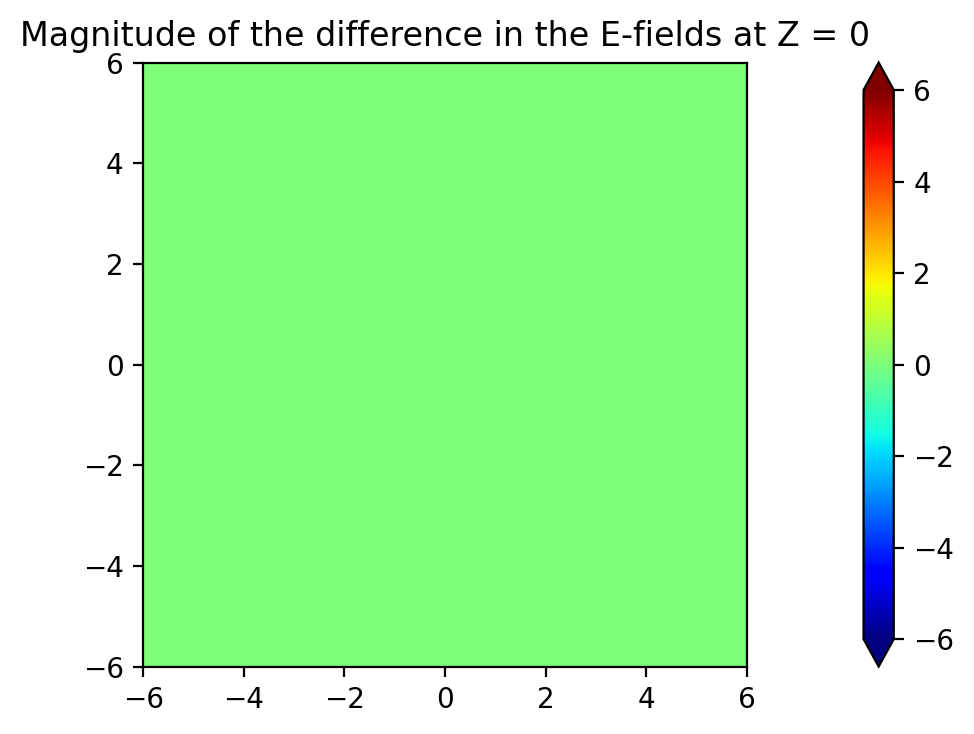

In [5]:
# Since E-field = -∇𝜙, and 𝜙 is any potential field, I can use any function which produces a E-field as a basis.
# To that end, I have decided to use the the E-field of a point charge (I know it's simple, I'm new to Python), which
# has the equation: E = (q/r^2)er, where er is the unit vector in pointing from the origin of r to the charge.
# In cartesian coordinates with x0,y0,z0 as the charge location, this equation is:
# E = (q/((x-x0)^2+(y-y0)^2+(z-z0)^2))er
# In a proof that is also too long to put in a comment, it can be shown that:
# 𝜙(r) = q/(4pir) = -int(0 to r) of (q/r^2)er dot dr 
# Converting this to cartesian coordinates with x0,y0,z0 as the charge location:
# 𝜙(x,y,z) = q/(4pi((x-x0)^2+(y-y0)^2+(z-z0)^2)^(1/2))
# Arranging 8 of these in an octopole at the vertices of a cube should make for an interesting potential/field
# NOTE: I ended up writing a function for computing the potential of a point charge based on the above formula, and it
#       ended up as just a worse version of ed.point_charge_potential, so I used that instead.
# PS: I attempted to make a '4D' (3D point plot with color grading) plot, and discovered a serious issue using scatter3D's 
#     color input which prevented me from finishing it (that's 2 hours I'm not seeing again)

# Code derived from previous EE330 modules by Jordan Harris-Toovy

# Import & declair computational python packages:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Import and (re)load the custom libaries for electrodynamics and vector calculus:
import VectorCalculus as vc
import Electrodynamics as ed

# Setup coordinate grid parameters:
nPoints = 256
sBox = 6
X,Y,Z = ed.coordinates(L=sBox, N=nPoints)

# Define charges for octopole:
q1 = -1
qx1 = 3
qy1 = 3
qz1 = 3
q2 = 1
qx2 = -3
qy2 = -3
qz2 = -3
q3 = 1
qx3 = -3
qy3 = 3
qz3 = 3
q4 = -1
qx4 = 3
qy4 = -3
qz4 = -3
q5 = 1
qx5 = 3
qy5 = -3
qz5 = 3
q6 = -1
qx6 = -3
qy6 = 3
qz6 = -3
q7 = 1
qx7 = 3
qy7 = 3
qz7 = -3
q8 = -1
qx8 = -3
qy8 = -3
qz8 = 3

# Create potential arrays for octopole and combine:
Pcp1 = ed.point_charge_potential(q1,[qx1,qy1,qz1],X,Y,Z)
Pcp2 = ed.point_charge_potential(q2,[qx2,qy2,qz2],X,Y,Z)
Pcp3 = ed.point_charge_potential(q3,[qx3,qy3,qz3],X,Y,Z)
Pcp4 = ed.point_charge_potential(q4,[qx4,qy4,qz4],X,Y,Z)
Pcp5 = ed.point_charge_potential(q5,[qx5,qy5,qz5],X,Y,Z)
Pcp6 = ed.point_charge_potential(q6,[qx6,qy6,qz6],X,Y,Z)
Pcp7 = ed.point_charge_potential(q7,[qx7,qy7,qz7],X,Y,Z)
Pcp8 = ed.point_charge_potential(q8,[qx8,qy8,qz8],X,Y,Z)
PcpT = Pcp1 + Pcp2 + Pcp3 + Pcp4 + Pcp5 + Pcp6 + Pcp7 + Pcp8

# Create a normalized potential array for coloring:
vmin = np.min(PcpT)
PaC = PcpT - vmin
vmax = np.max(PaC)
PaC = PaC/vmax

# Plot the slices which are on the two Z-planes where the charges are located:
pt1 = ed.draw_scalar_field(X,Y,Z,PaC,3,1)
pt1.set_title('Relative octopole potential Z=3')
pt2 = ed.draw_scalar_field(X,Y,Z,PaC,-3,1)
pt2.set_title('Relative octopole potential Z=-3')

# Compute the gradient of the potential:
Gsp = X[1,0,0] - X[0,0,0]
PG = vc.grad(PcpT,Gsp)
PG = -1*PG

# Compute the origional E-field:
Pce1 = ed.point_charge_field(q1,[qx1,qy1,qz1],X,Y,Z)
Pce2 = ed.point_charge_field(q2,[qx2,qy2,qz2],X,Y,Z)
Pce3 = ed.point_charge_field(q3,[qx3,qy3,qz3],X,Y,Z)
Pce4 = ed.point_charge_field(q4,[qx4,qy4,qz4],X,Y,Z)
Pce5 = ed.point_charge_field(q5,[qx5,qy5,qz5],X,Y,Z)
Pce6 = ed.point_charge_field(q6,[qx6,qy6,qz6],X,Y,Z)
Pce7 = ed.point_charge_field(q7,[qx7,qy7,qz7],X,Y,Z)
Pce8 = ed.point_charge_field(q8,[qx8,qy8,qz8],X,Y,Z)
PceT = Pce1 + Pce2 + Pce3 + Pce4 + Pce5 + Pce6 + Pce7 + Pce8

# Plot the two fields to check for equivalence:
PPG = ed.draw_vector_field(X,Y,Z,*PG)
PPG.set_xlabel('X-Axis')
PPG.set_ylabel('Y-Axis')
PPG.set_zlabel('Z-Axis')
PPG.set_title('E-field computed via the gradient of the potential')
PPE = ed.draw_vector_field(X,Y,Z,*PceT)
PPE.set_xlabel('X-Axis')
PPE.set_ylabel('Y-Axis')
PPE.set_zlabel('Z-Axis')
PPE.set_title('E-field computed directly')

# Calculate the difference between the two different E-field vectors:
Comb = np.absolute(PG - PceT)
CombMag = np.sqrt((Comb[0,:,:,:]**2)+(Comb[1,:,:,:]**2)+(Comb[2,:,:,:]**2))

# Plot the magnitude of the difference between the two different E-field vectors in a slice:
CmagS = ed.draw_scalar_field(X,Y,Z,CombMag,0,6)
CmagS.set_title('Magnitude of the difference in the E-fields at Z = 0')

# Print the value of the magnitude of the difference between the two different E-field vectors in the center
print('The magnitude of the difference in the E-fields at 0,0,0 is ', CombMag[128,128,128])


## Summary and Reflection

Summarize your efforts, insights, and conclusions in the space below.
- What did you find?
- What was difficult?
- How confident are you in your work?
- What questions do you have after working through this exercise?

***TBW***